# Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.regression import *
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [3]:
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Exploratory Data Analysis

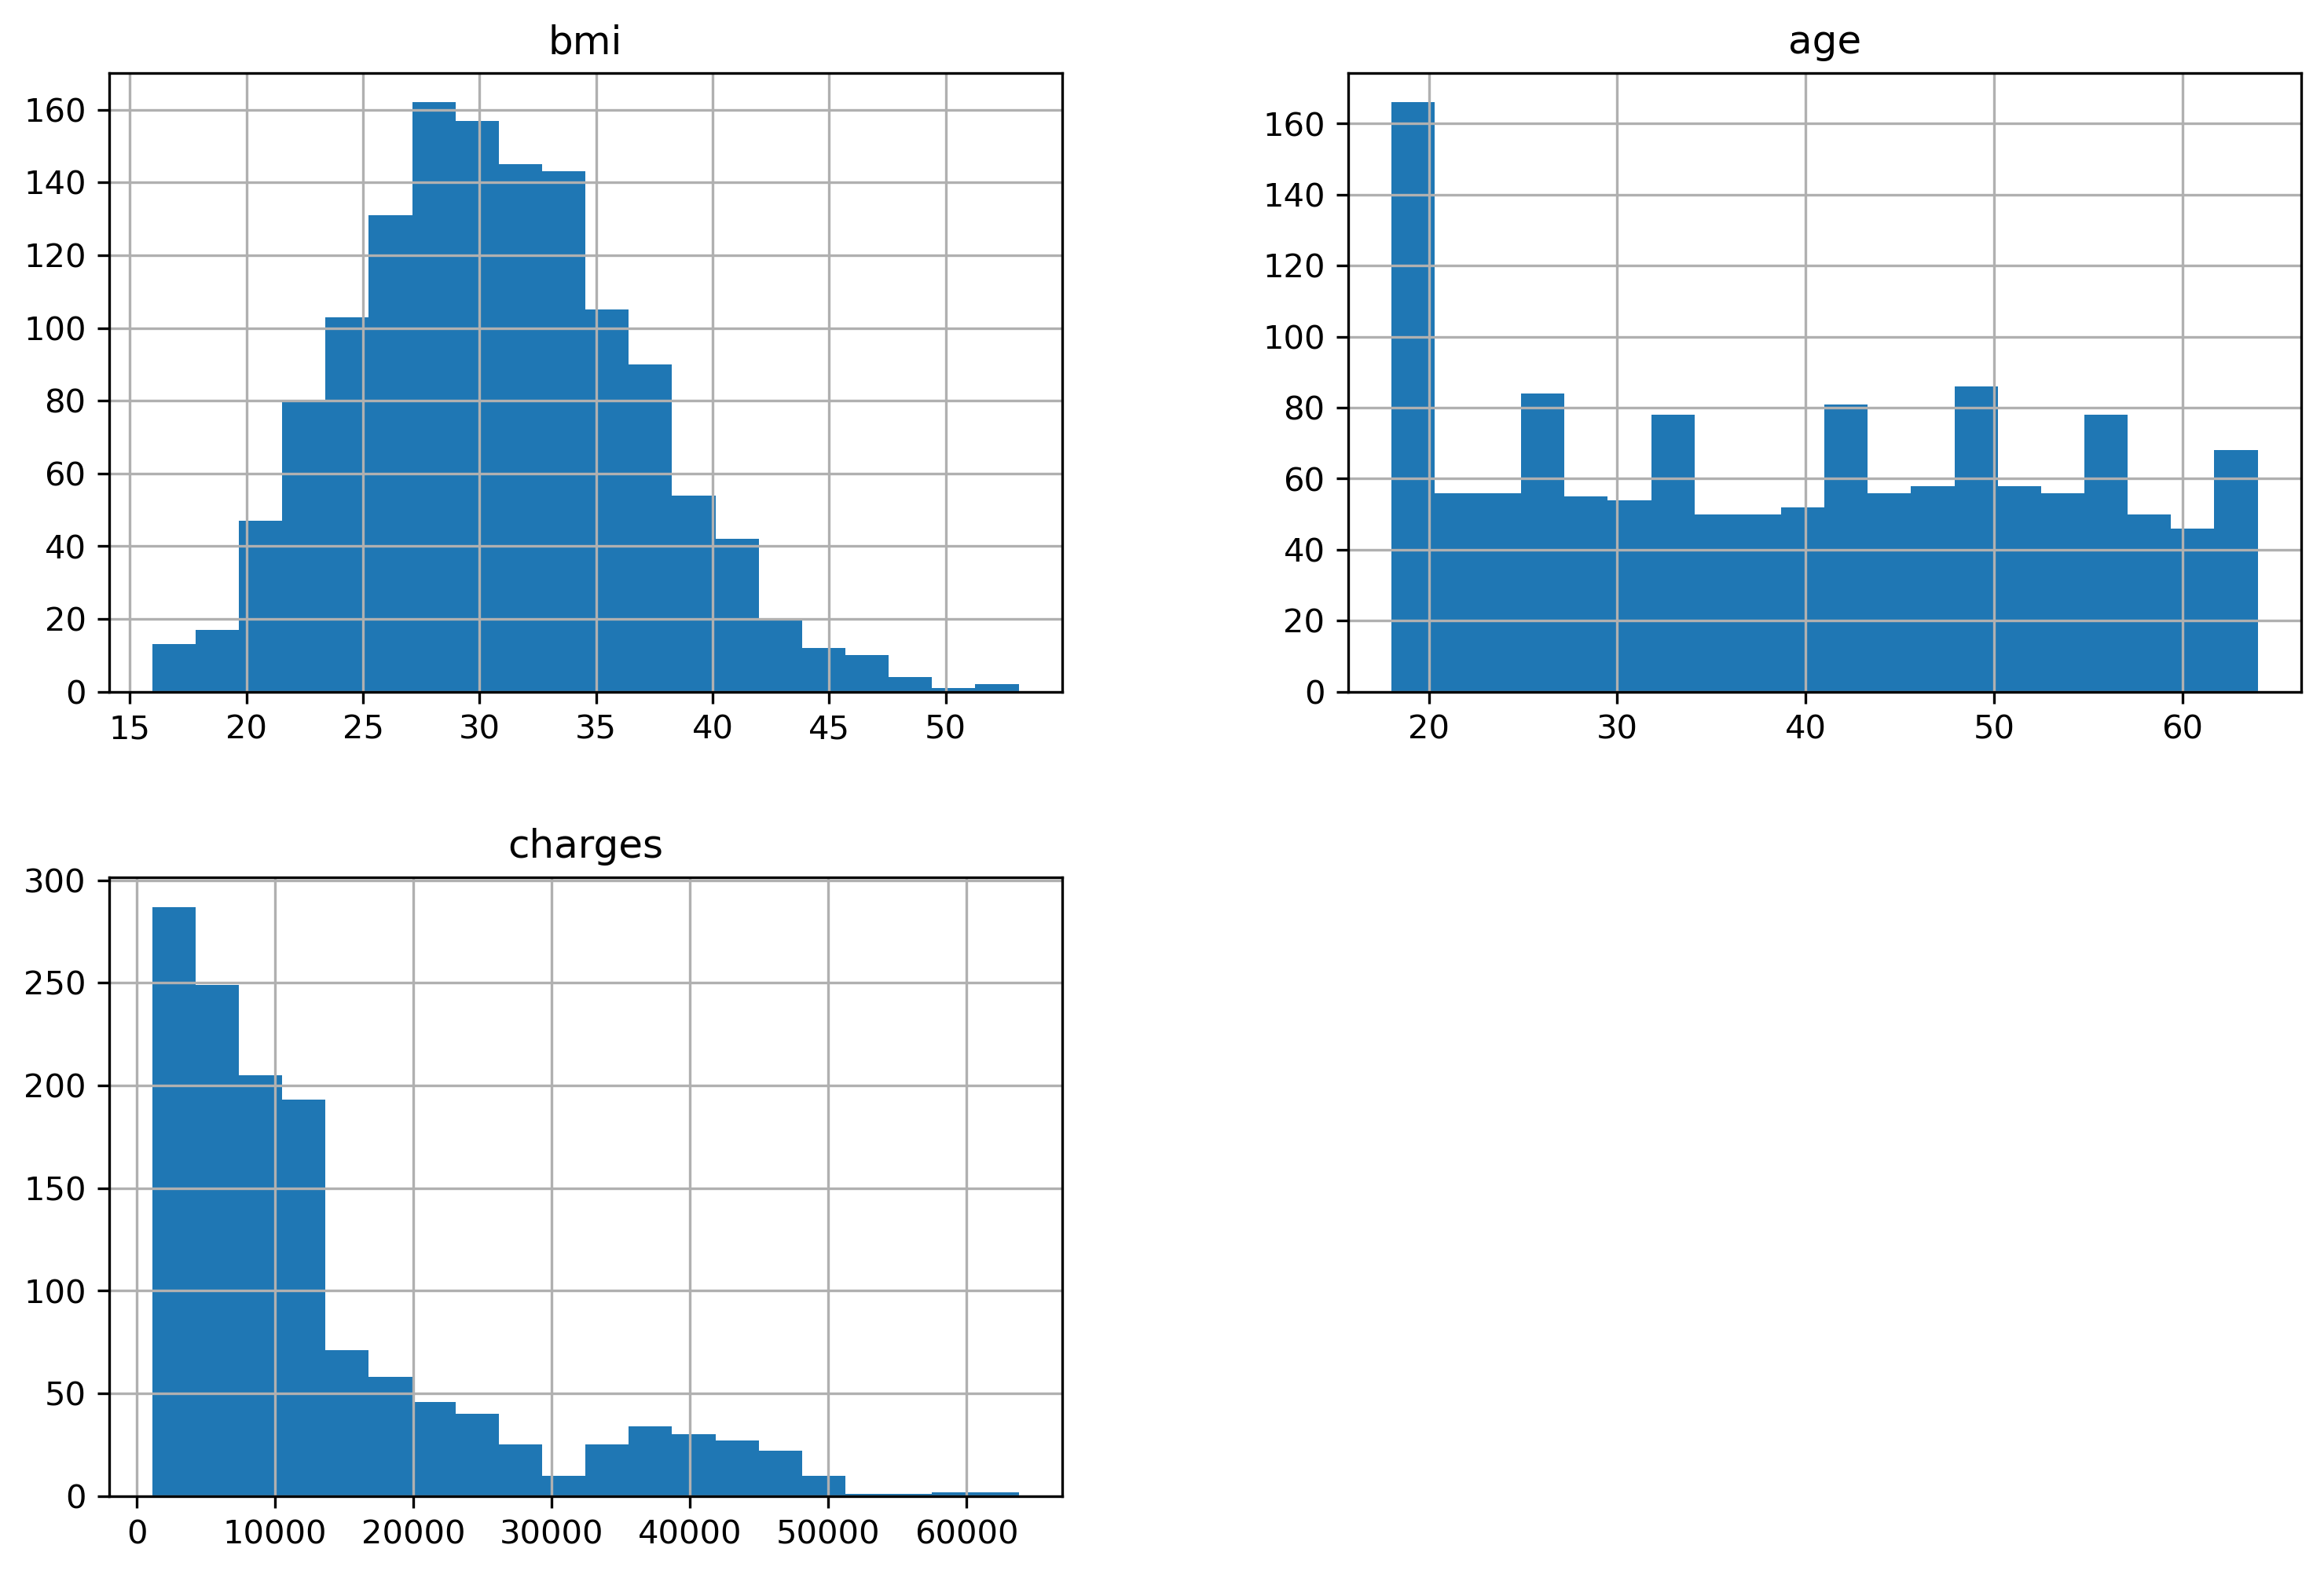

In [12]:
numeric = ['bmi', 'age', 'charges']

data[numeric].hist(bins=20, figsize = (12,8))
plt.show()

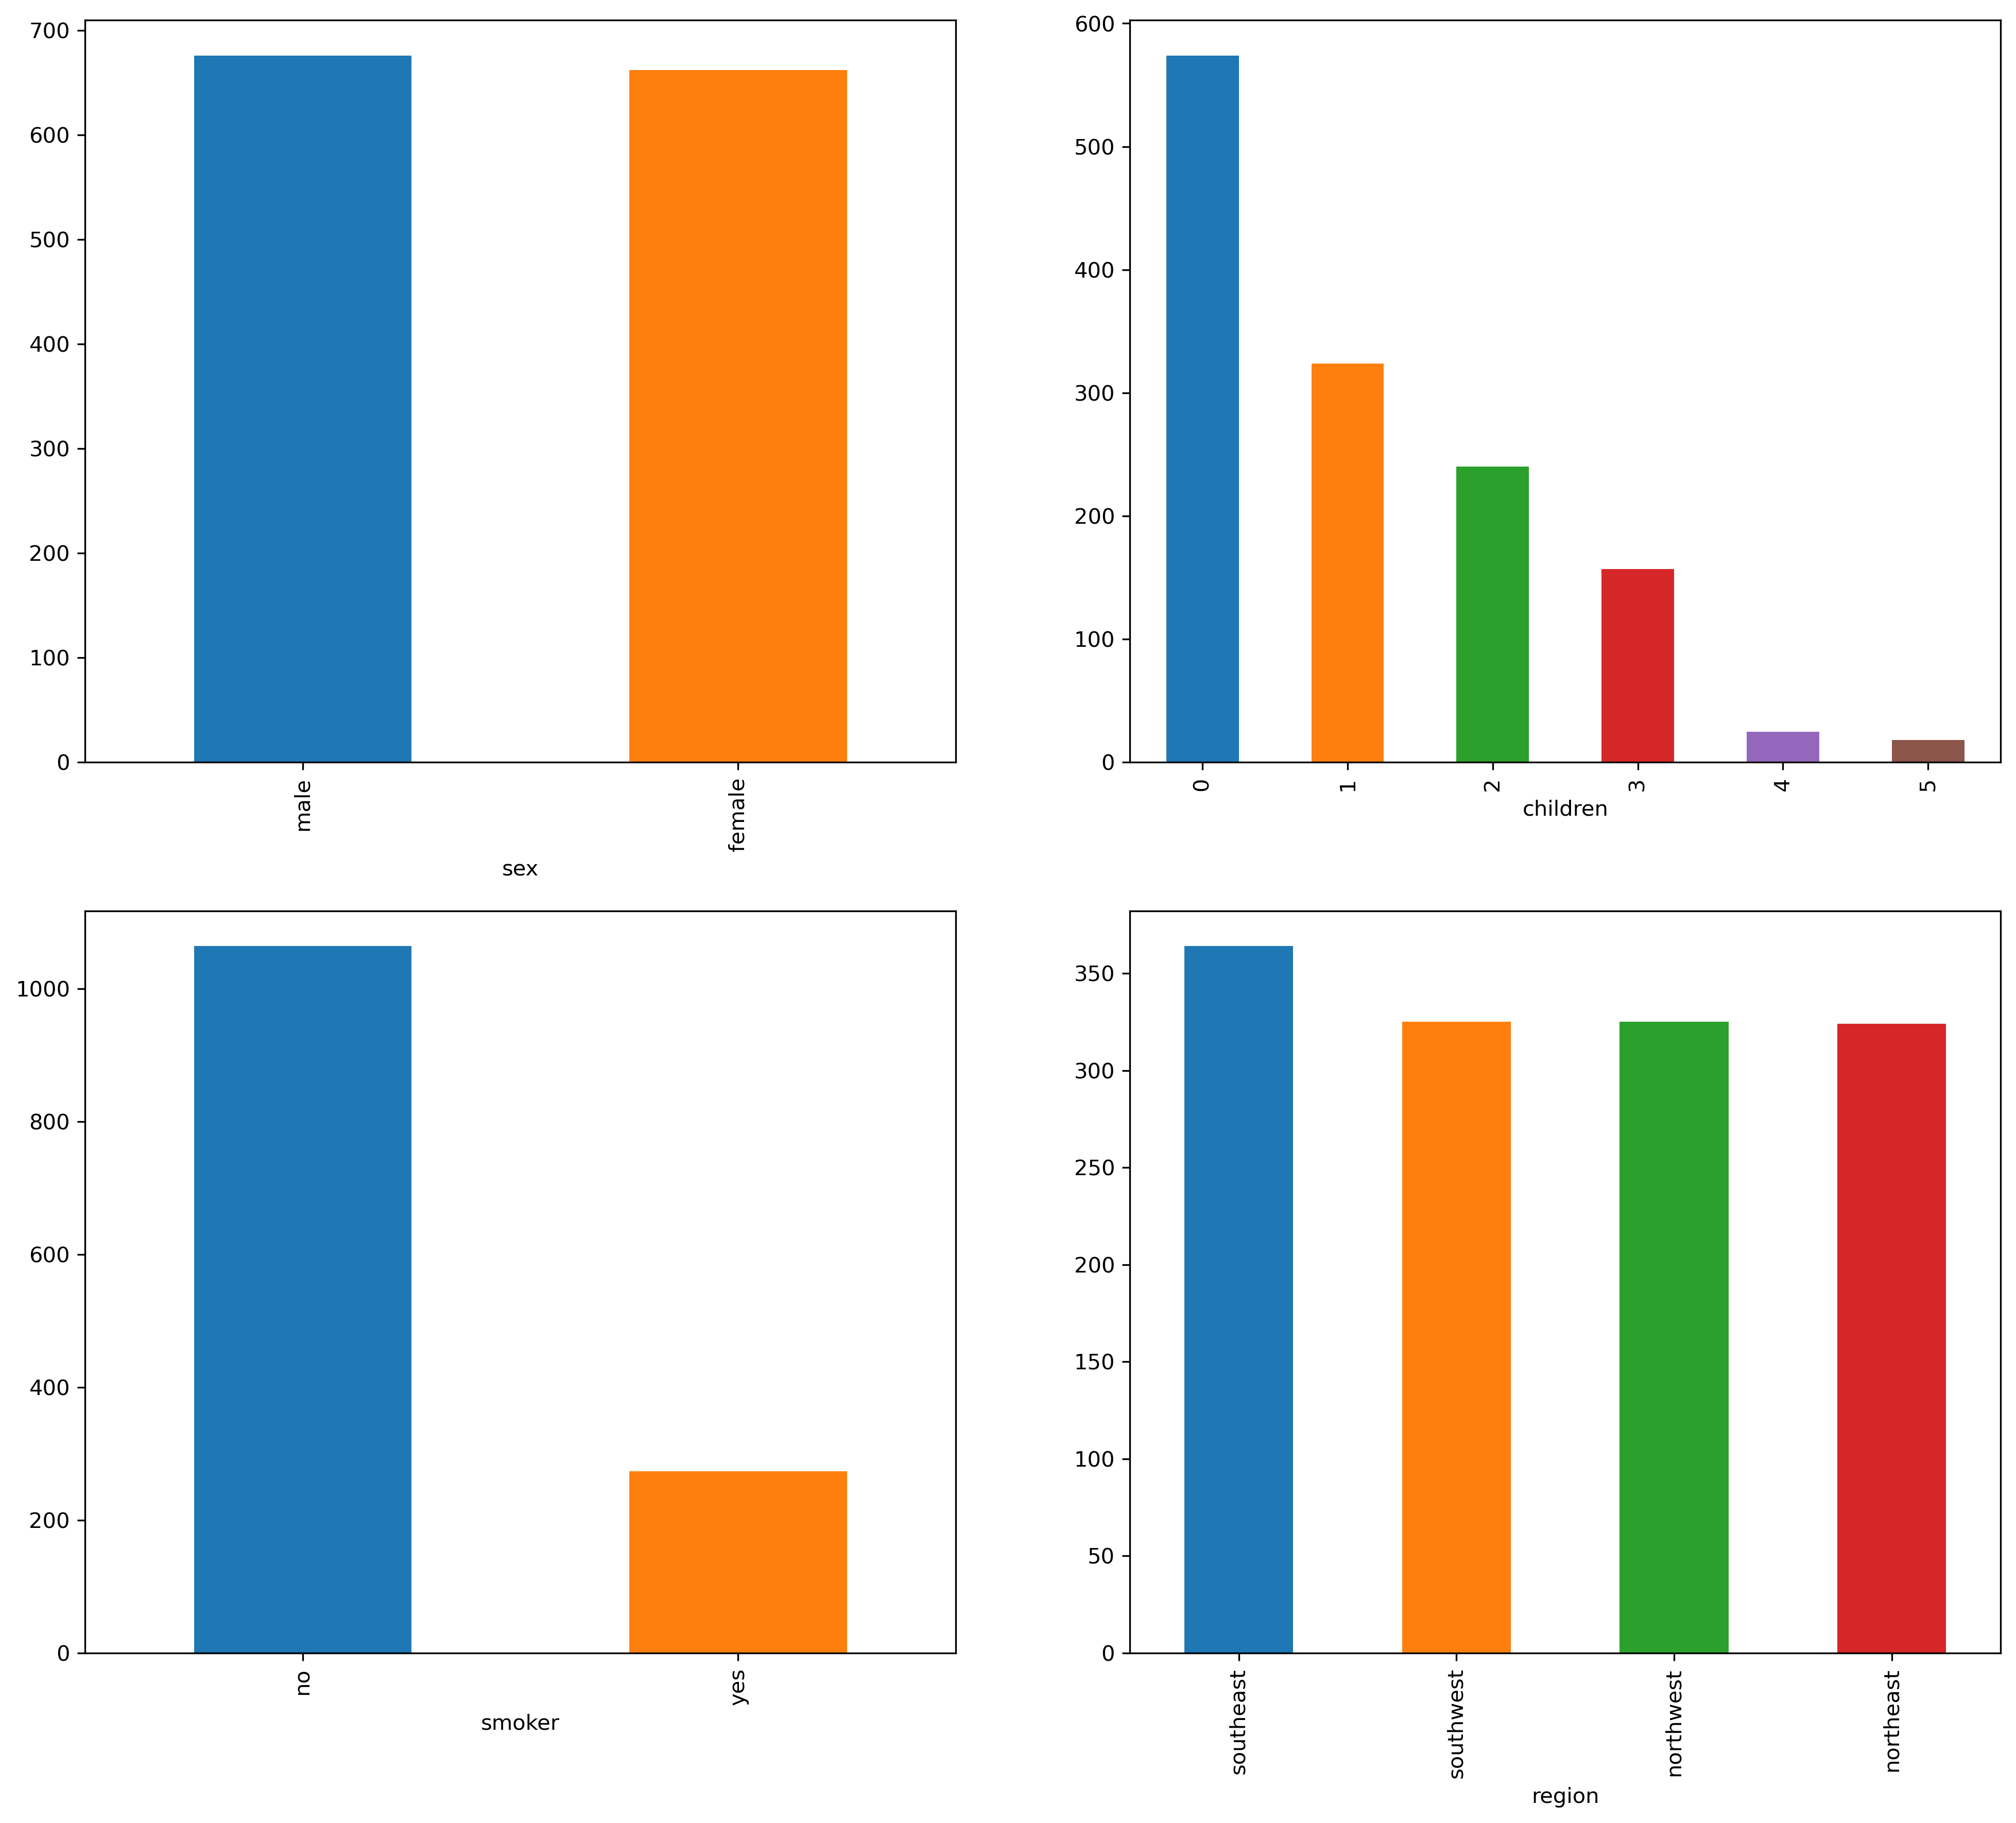

In [9]:
categorical = ['sex', 'children', 'smoker', 'region']
color = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

fig, axes = plt.subplots(2, 2, figsize = (16,14))

for ax, col in zip(axes.flatten(), categorical) :
    data[col].value_counts().plot(kind = 'bar', ax = ax, color = color)
    ax.set_xlabel(col)

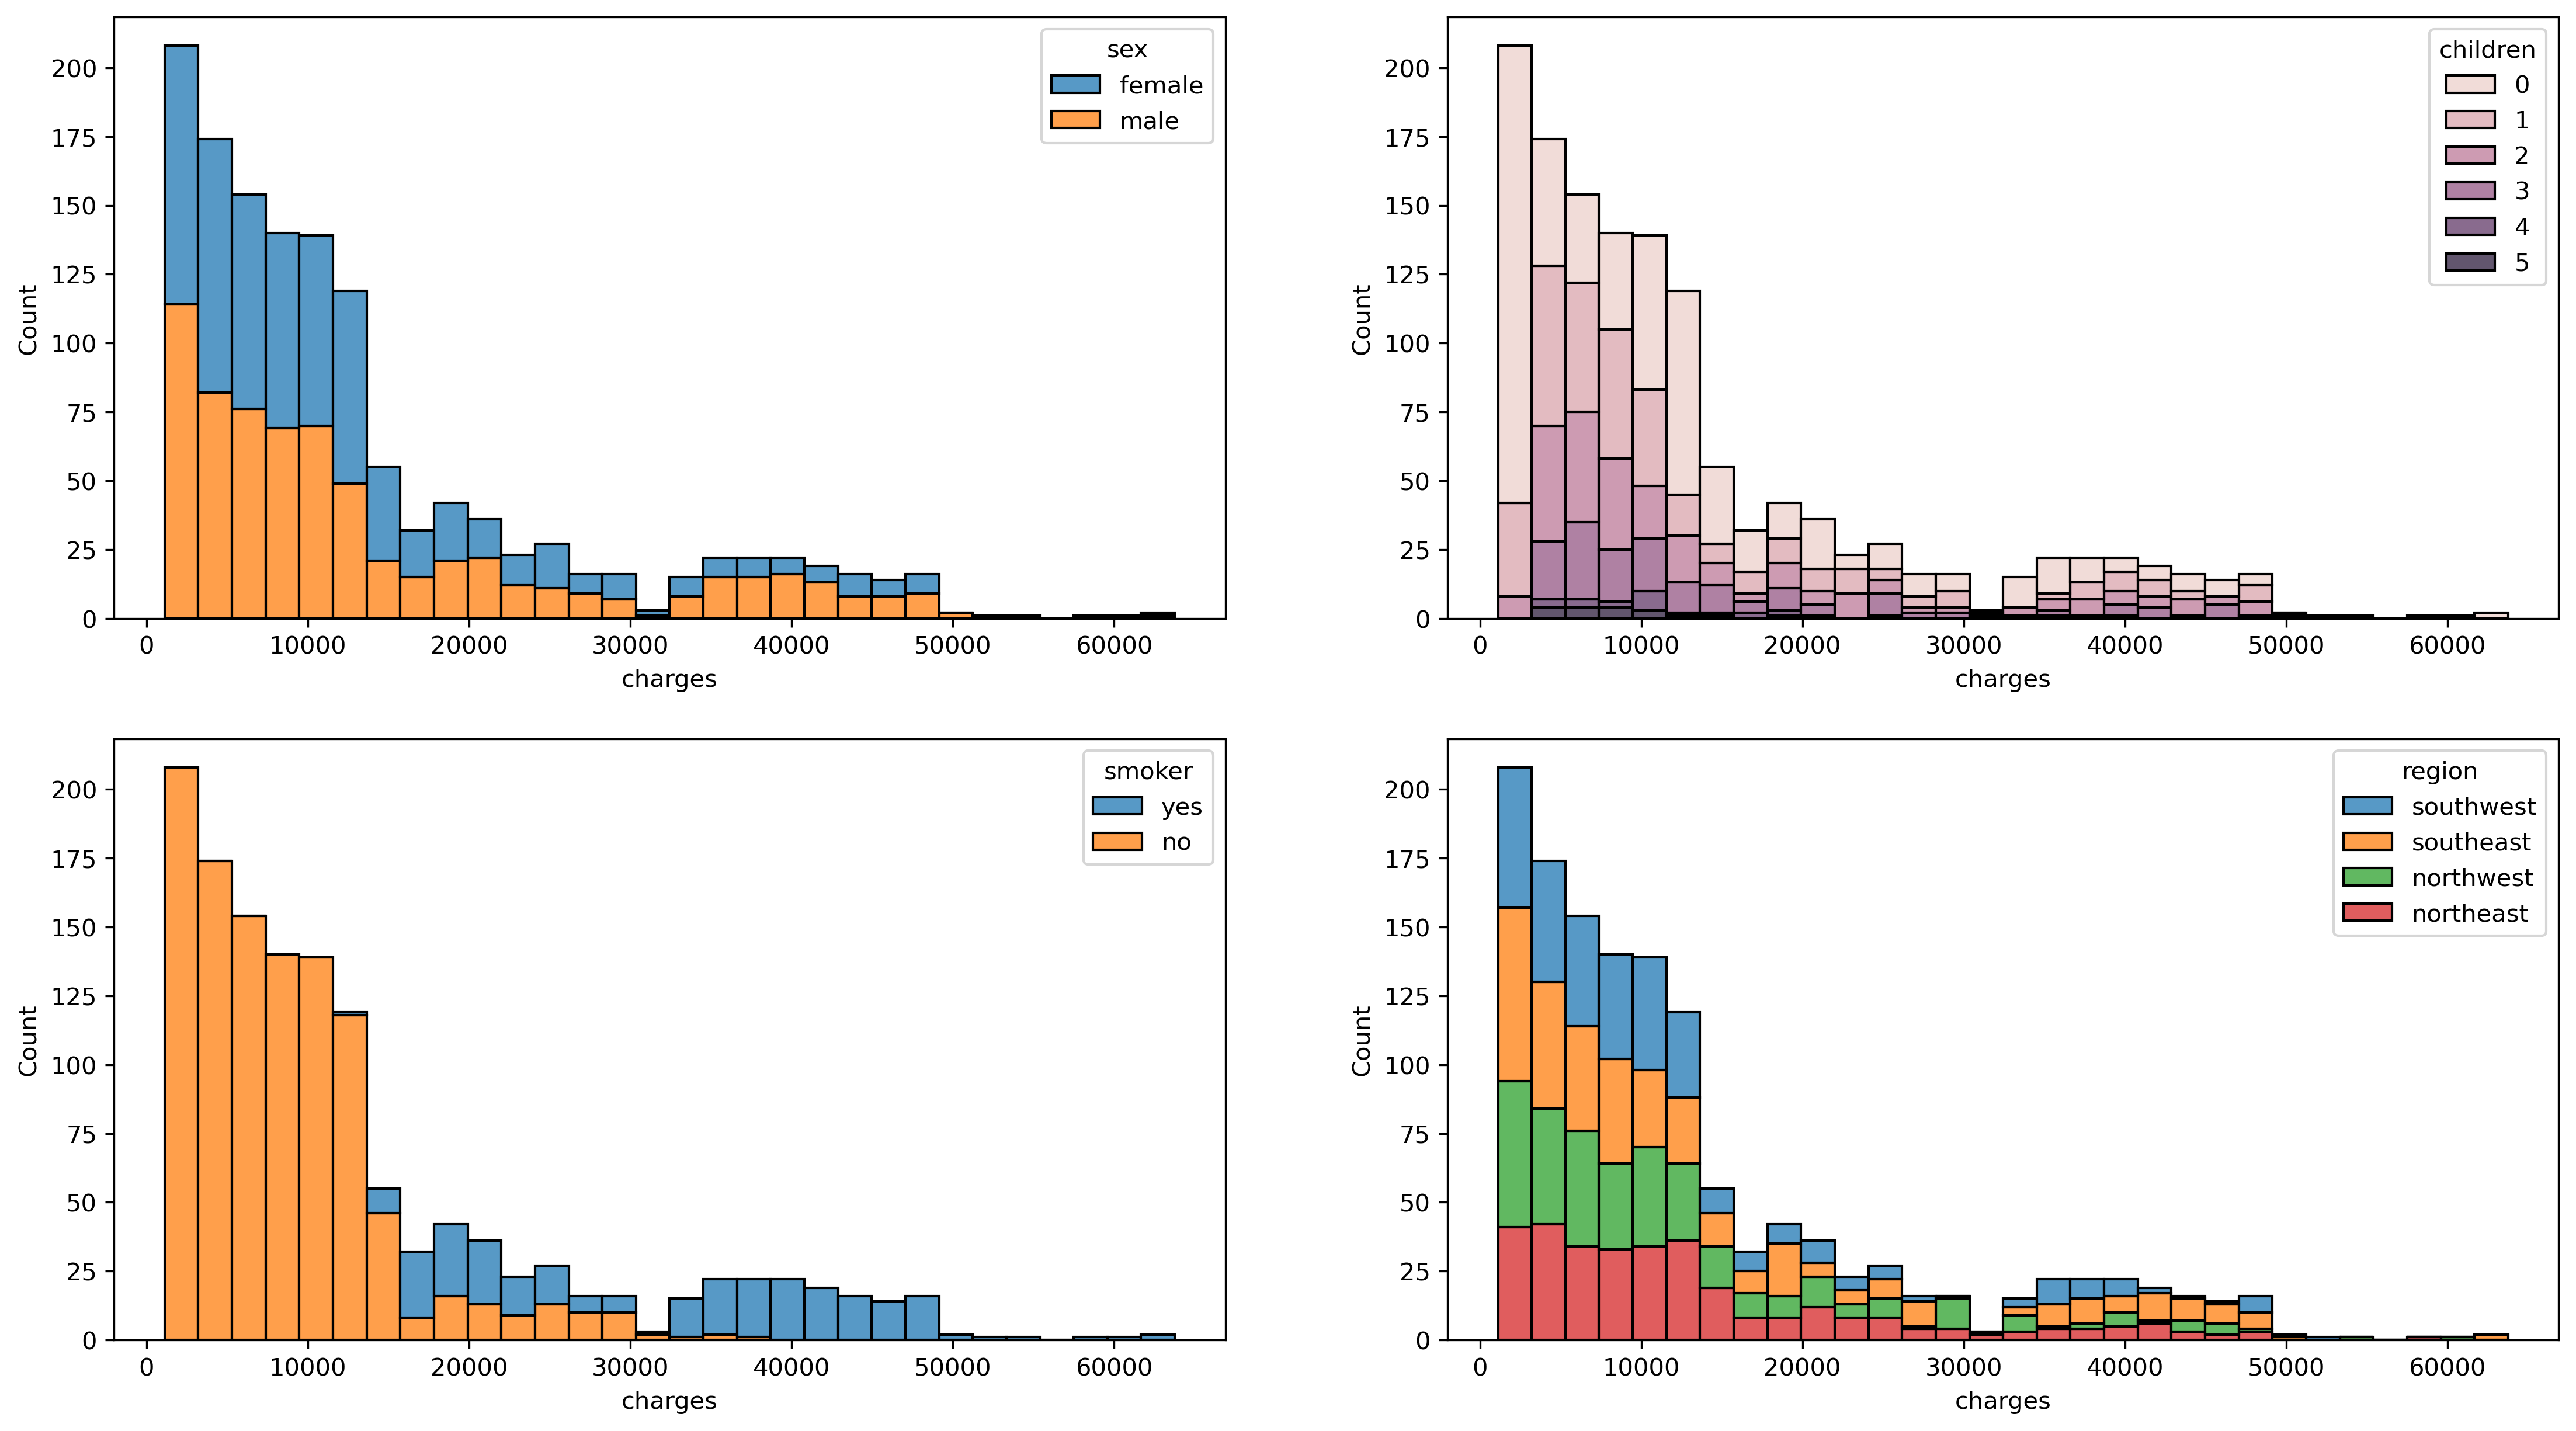

In [100]:
fig, axes = plt.subplots(2, 2, figsize=(18,10))
for ax, col in zip(axes.flatten(), categorical):
    sns.histplot(data, x='charges', hue=col,
               multiple='stack', ax=ax)

### Initializing the PyCaret Environment

In [15]:
reg = setup(data=data, target='charges', train_size = 0.8,
            normalize = True, transform_target = True)

,Description,Value
0,session_id,6718
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1070, 14)"
